## Assignment 1

* Compute the reconstruction error for fixed `theta = np.linspace(0., 180., na)` with `na = 400` for various values of `sigma`. Present the results in a graph and table.

* Compute the reconstruction error for fixed `sigma = 0` and varying `na`. Present the results in a graph and table.

We define the reconstuction error between ground truth $\overline{u}$ and reconstruction $\widetilde{u}$ as

$$e = \|\widetilde{u} - \overline{u}\| / \|\overline{u}\|.$$

Draw conclusions about the influence of angular sampling and noise on the reconstruction error. To get you started, we defined a function `reconstruct` which performs the experiment for given `na`, `sigma` and returns the reconstructed image. You can then loop over either `na` or `sigma` and compute the errors. Plotting the results gives some insight in the reconstructions and the errors.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import radon, iradon
from skimage.data import shepp_logan_phantom

def reconstruct(u, na, sigma):
    """
    CT reconstruction of given image with noise and subsampling. 

    Input:
        u     - ground truth image, square numpy-array of size (nx,nx)
        na    - number of angles in range [0,180) to use, integer
        sigma - noise level, scalar

    Output:
        u_fbp - reconstructed image, square numpy-array of size (nx,nx)
    """

    # settings
    nx    = u.shape[0]
    theta = np.linspace(0., 180., na)

    # sinogram
    f = radon(u, theta=theta)
    f_noisy = f + sigma * np.random.randn(nx,na)

    # reconstruction
    u_fbp = iradon(f_noisy,theta=theta)

    #
    return u_fbp



reconstruction error: 0.12611342541703216


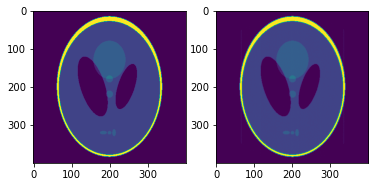

In [4]:
na    = 400
sigma = .1

ut = shepp_logan_phantom()
ur = reconstruct(ut, na, sigma)
error = np.linalg.norm(ut - ur) / np.linalg.norm(ut)

print('reconstruction error:', error)

fig, ax = plt.subplots(1,2)

ax[0].imshow(ut, vmin=0, vmax=1)
ax[1].imshow(ur, vmin=0, vmax=1)